In [1]:
import pandas as pd 
import sqlite3 as sql

In [2]:
db_name = "stores.db"
conn = sql.connect(db_name)

In [3]:
print(conn)

In [4]:
#All Columns
query = """
    SELECT * FROM orderdetails
"""
pd.read_sql(query, conn)

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4
...,...,...,...,...,...
2991,10425,S24_2300,49,127.79,9
2992,10425,S24_2840,31,31.82,5
2993,10425,S32_1268,41,83.79,11
2994,10425,S32_2509,11,50.32,6


In [5]:
# Define the query to select single column
query = """
    SELECT productCode FROM orderdetails
"""

# Execute the query and load the result into a DataFrame
pd.read_sql(query, conn)

,productCode
0,S18_1749
1,S18_2248
2,S18_4409
3,S24_3969
4,S18_2325
...,...
2991,S24_2300
2992,S24_2840
2993,S32_1268
2994,S32_2509


In [6]:
query = """
    SELECT quantityOrdered, priceEach 
    FROM orderdetails
    LIMIT 10
"""
pd.read_sql(query, conn)

,quantityOrdered,priceEach
0,30,136.00
1,50,55.09
2,22,75.46
3,49,35.29
4,25,108.06
5,26,167.06
6,45,32.53
7,46,44.35
8,39,95.55
9,41,43.13


In [7]:
query = """
    SELECT productCode, priceEach, sum(quantityOrdered) AS Quantity_Orderd , sum(priceEach) AS Total_Price
    FROM orderdetails
    GROUP BY productCode 
    ORDER BY 4 Desc
"""
pd.read_sql(query, conn)

,productCode,priceEach,Quantity_Orderd,Total_Price
0,S18_3232,165.95,1808,8074.17
1,S10_1949,214.30,961,5524.66
2,S12_1108,205.72,1019,5051.61
3,S10_4698,172.36,985,4824.07
4,S12_1099,165.38,933,4656.05
...,...,...,...,...
104,S32_2206,36.21,906,988.04
105,S24_2972,32.10,912,916.45
106,S24_3969,35.29,824,909.69
107,S24_2840,30.41,983,897.78


In [8]:
query = """
SELECT 
    productCode,
    SUM(quantityOrdered * priceEach) AS TotalAmount
FROM 
    orderdetails
GROUP BY 
    productCode
ORDER BY 2 Desc;
"""
pd.read_sql(query,conn)

,productCode,TotalAmount
0,S18_3232,276839.98
1,S12_1108,190755.86
2,S10_1949,190017.96
3,S10_4698,170686.00
4,S12_1099,161531.48
...,...,...
104,S32_2206,33268.76
105,S24_2840,31627.96
106,S24_2972,30972.87
107,S24_3969,29763.39


In [9]:
query = """
SELECT 
    productCode,
    SUM(quantityOrdered * priceEach) AS TotalAmount
FROM 
    orderdetails
GROUP BY 
    productCode;
"""
pd.read_sql(query,conn)

,productCode,TotalAmount
0,S10_1678,90157.77
1,S10_1949,190017.96
2,S10_2016,109998.82
3,S10_4698,170686.00
4,S10_4757,127924.32
...,...,...
104,S700_3505,84992.25
105,S700_3962,78919.06
106,S700_4002,71753.93
107,S72_1253,42692.53


In [10]:
query = """
    SELECT productCode, sum(quantityOrdered)  quantityOrdered, (SELECT quantityInStock 
                                                                    FROM products
                                                                    WHERE products.productCode = orderdetails.productCode) QuantityInStock
    FROM orderdetails
    GROUP BY productCode 
    ORDER BY 3 Desc
"""
df = pd.read_sql(query, conn)
df

,productCode,quantityOrdered,QuantityInStock
0,S12_2823,1028,9997
1,S18_1984,917,9772
2,S700_2466,984,9653
3,S24_3432,894,9446
4,S18_2325,957,9354
...,...,...,...
104,S72_3212,958,414
105,S32_1374,1014,178
106,S32_4289,972,136
107,S12_1099,933,68


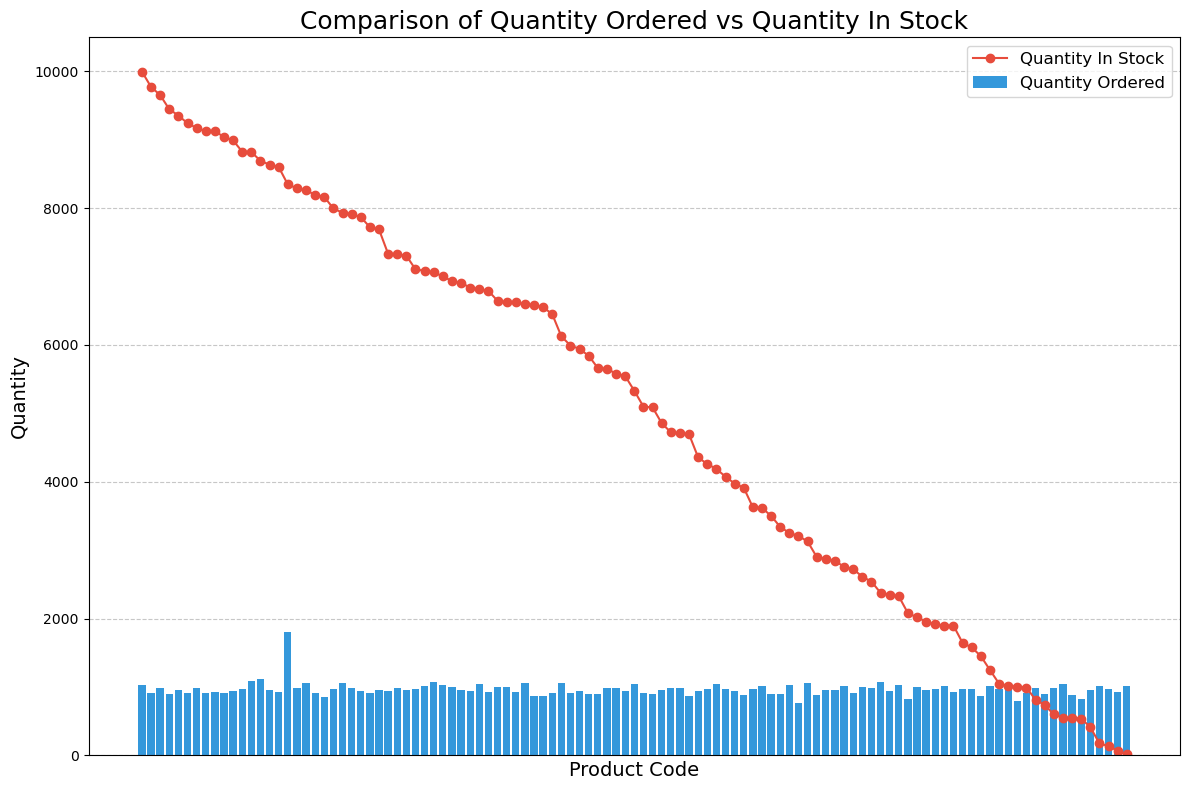

In [13]:
import matplotlib.pyplot as plt

# Assuming 'df' is the result of pd.read_sql(query, conn)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot quantity ordered as a bar chart
ax.bar(df['productCode'], df['quantityOrdered'], color='#3498db', label='Quantity Ordered')

# Plot quantity in stock as a line chart
ax.plot(df['productCode'], df['QuantityInStock'], marker='o', linestyle='-', color='#e74c3c', label='Quantity In Stock')

# Set title and labels
ax.set_title('Comparison of Quantity Ordered vs Quantity In Stock', fontsize=18)
ax.set_xlabel('Product Code', fontsize=14)
ax.set_ylabel('Quantity', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=12)

# Show gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()

### Low Stock Orders

        
       Low stock =  SUM(Quantity Ordered) / (Quantity In Stock)

In [12]:
query = """
    SELECT 
        productCode, 
        SUM(quantityOrdered) / (SELECT quantityInStock 
                                 FROM products 
                                 WHERE products.productCode = orderdetails.productCode) AS low_stock
    FROM 
        orderdetails
    GROUP BY 
        productCode
    ORDER BY 
        2 DESC
    LIMIT 10
"""
pd.read_sql(query, conn)

,productCode,low_stock
0,S24_2000,67
1,S12_1099,13
2,S32_4289,7
3,S32_1374,5
4,S72_3212,2
5,S700_3167,1
6,S700_1938,1
7,S50_4713,1
8,S32_3522,1
9,S18_2795,1


In [18]:
#Low Stock -> FLoat
# Round the Float digit
query = """
    SELECT productCode, 
    ROUND(sum(quantityOrdered)*1.0/(SELECT quantityInStock 
                                                                 FROM products p
                                                                WHERE p.productCode = od.productCode)) low_stock
      FROM orderdetails od
  GROUP BY productCode
  ORDER BY 2 Desc
     LIMIT 10
"""

pd.read_sql(query, conn)

,productCode,low_stock
0,S24_2000,68.0
1,S12_1099,14.0
2,S32_4289,7.0
3,S32_1374,6.0
4,S72_3212,2.0
5,S700_3167,2.0
6,S50_4713,2.0
7,S18_2795,2.0
8,S18_2248,2.0
9,S700_1938,1.0


#### Products Performance

In [19]:
query = """
    SELECT productCode, sum(quantityOrdered*priceEach) prod_perf
     From orderdetails
     GROUP BY 1
     ORDER BY 2 DESC
     LIMIT 10"""

pd.read_sql(query,conn)

,productCode,prod_perf
0,S18_3232,276839.98
1,S12_1108,190755.86
2,S10_1949,190017.96
3,S10_4698,170686.00
4,S12_1099,161531.48
5,S12_3891,152543.02
6,S18_1662,144959.91
7,S18_2238,142530.63
8,S18_1749,140535.60
9,S12_2823,135767.03


In [20]:
# Common Table Expression (CTE)

query = """With
low_stock_table AS (
SELECT productCode, 
       ROUND(SUM(quantityOrdered) * 1.0/(SELECT quantityInStock
                                           FROM products p
                                          WHERE od.productCode = p.productCode), 2) AS low_stock
  FROM orderdetails od
 GROUP BY productCode
 ORDER BY low_stock DESC
 LIMIT 10
)

SELECT productCode FROM low_stock_table;
"""

pd.read_sql(query,conn)

,productCode
0,S24_2000
1,S12_1099
2,S32_4289
3,S32_1374
4,S72_3212
5,S700_3167
6,S50_4713
7,S18_2795
8,S18_2248
9,S700_1938


In [22]:
# Priority Products for restocking

query = """With
low_stock_table AS (
SELECT productCode, 
       ROUND(SUM(quantityOrdered) * 1.0/(SELECT quantityInStock
                                           FROM products p
                                          WHERE od.productCode = p.productCode), 2) AS low_stock
  FROM orderdetails od
 GROUP BY productCode
 ORDER BY low_stock DESC
 LIMIT 10
)

SELECT productCode, sum(quantityOrdered*priceEach) Products_Performance
     From orderdetails
     Where productCode IN (SELECT productCode FROM low_stock_table)
     GROUP BY 1
     ORDER BY 2 DESC
     ;
"""

pd.read_sql(query,conn)

,productCode,Products_Performance
0,S12_1099,161531.48
1,S18_2795,132275.98
2,S32_1374,89364.89
3,S700_3167,76618.40
4,S50_4713,73670.64
5,S700_1938,69531.61
6,S24_2000,67193.49
7,S32_4289,60493.33
8,S72_3212,47550.40
9,S18_2248,45306.77
